# Phase II: Data Curation, Exploratory Analysis and Plotting

### <font color='red'> DS3000 SEC04 (Spring 2025) </font>

### <font color='red'> Professor: Dr. Mohit Singhal </font>

### <font color='red'> Team Members: Tarun, Ryan, Saanika, Alex </font>

INTRODUCTION:

Are there any indicators that could help us predict the economic status of a country? Our goal is to analyze the past 15-25 years worth of data regarding the GDP growth, unemployment rate and inflation rate of different areas of the world and see if there were any underlying indicators behind major recessions that could help us predict future recessions using machine learning. We'd also like to explore the idea of picking statistics that aren't intuitively related in order to find out if there exists a correlation between the two. Furthermore, with information spreading about how global education levels have fallen since COVID, We want to study if it has a potential effect on the economy of the world. Our key questions are:

1. Is it possible to predict economic status given certain parameters?
2. Is there a correlation between unemployment rate and inflation? Does this differ across regions?
3. Can education levels impact economy?
4. Is Foreign Direct Investment beneficial for economies?
5. Are some regions of thr world growing differently than others?

We plan to use the [World Bank API](https://documents.worldbank.org/en/publication/documents-reports/api ) to gather economic data from different countries and world regions to help understand trends in modern history.

Below is a short demonstration of reading through the World Bank API and it's not very difficult to use.

## API Call Explanation:

For the API call, when we call the world bank, we manipulate the APi using the following parameters

1. Indicators: Using various indicators, we can call different types of information such as GDP Growth (%), Inflation Rate (%), Unemployment Rate (%), and Foreign Direct Investment as a % of GDP.
2. Date range: using the date portion of the API link, we can call data from the API for each of the countries we are looking at for a specific date range.


In [2]:
import requests
import pandas as pd

# merged_df = pd.DataFrame()
 
# Define indicators
gdp_indicator = "NY.GDP.MKTP.KD.ZG"  # GDP Growth (%)
unemployment_indicator = "SL.UEM.TOTL.ZS"  # Unemployment Rate (%)
inflation_indicator = "FP.CPI.TOTL.ZG"  # Inflation Rate (%)
fdi_indicator = "BX.KLT.DINV.WD.GD.ZS" # FDI Amount ($)

years = list(range(2000, 2023))

# Function that gets all data from World Bank API
def fetch_data(indicator):
    url = f"http://api.worldbank.org/v2/country/all/indicator/{indicator}?date={years[0]}:{years[-1]}&format=json&per_page=1000"
    response = requests.get(url)
    data = response.json()

    return pd.DataFrame([
        {"Country": entry["country"]["value"],
         "Code": entry["country"]["id"],
         "Year": entry["date"],
         "Value": entry["value"]}
        for entry in data[1]
    ]) if isinstance(data, list) and len(data) > 1 else pd.DataFrame()

# Get data for each indicator
gdp_df = fetch_data(gdp_indicator).rename(columns={"Value": "GDP Growth (%)"})
unemployment_df = fetch_data(unemployment_indicator).rename(columns={"Value": "Unemployment Rate (%)"})
inflation_df = fetch_data(inflation_indicator).rename(columns={"Value": "Inflation Rate (%)"})
fdi_df = fetch_data(fdi_indicator).rename(columns={"Value": "Foreign Direct Investment"})


 # Merge all the coloumns
merged_df = gdp_df.merge(unemployment_df, on=["Country","Code", "Year"], how="outer")
merged_df = merged_df.merge(inflation_df, on=["Country", "Code", "Year"], how="outer")
merged_df = merged_df.merge(fdi_df, on=["Country", "Code","Year"], how="outer")


# Save to CSV
# merged_df.to_csv("foundationsOfDataScienceProject.csv")

merged_df[: 70]

,Country,Code,Year,GDP Growth (%),Unemployment Rate (%),Inflation Rate (%),Foreign Direct Investment
0,Africa Eastern and Southern,ZH,2000,3.214946,7.788317,8.601485,1.533787
1,Africa Eastern and Southern,ZH,2001,3.505726,7.676955,5.840354,4.773985
2,Africa Eastern and Southern,ZH,2002,3.836078,7.632330,8.763754,2.471801
3,Africa Eastern and Southern,ZH,2003,2.956241,7.586883,7.449700,2.460783
4,Africa Eastern and Southern,ZH,2004,5.555397,7.395648,5.023421,1.840140
...,...,...,...,...,...,...,...
65,Arab World,1A,2019,1.583715,10.216098,1.091848,1.225902
66,Arab World,1A,2020,-4.711784,11.325613,1.612222,1.304955
67,Arab World,1A,2021,4.031106,10.889659,2.965810,2.346639
68,Arab World,1A,2022,5.721433,9.953571,5.087542,2.195336


The above data set is mostly clean and the aim is to use machine learning to predict all of the statistics 1, 5, and 10 years into the future. We'll use numerical features like GDP, unemployment rate, inflation rate and categorical data such as country, region, and year. Using this, we can predict future values using the machine learning method of logistic regression. In the future, we would also like to explore the potential of using neural networks to categorize the countries/regions based on their economic statistics.

For the first graph, we'll only grab the unemployment and inflation rate data, and only focus on a few regions. For this example, let's focus on the data for 'Africa Eastern and Southern', 'Arab World', and 'European Union', as well as the aggregate 'World' data for comparison.

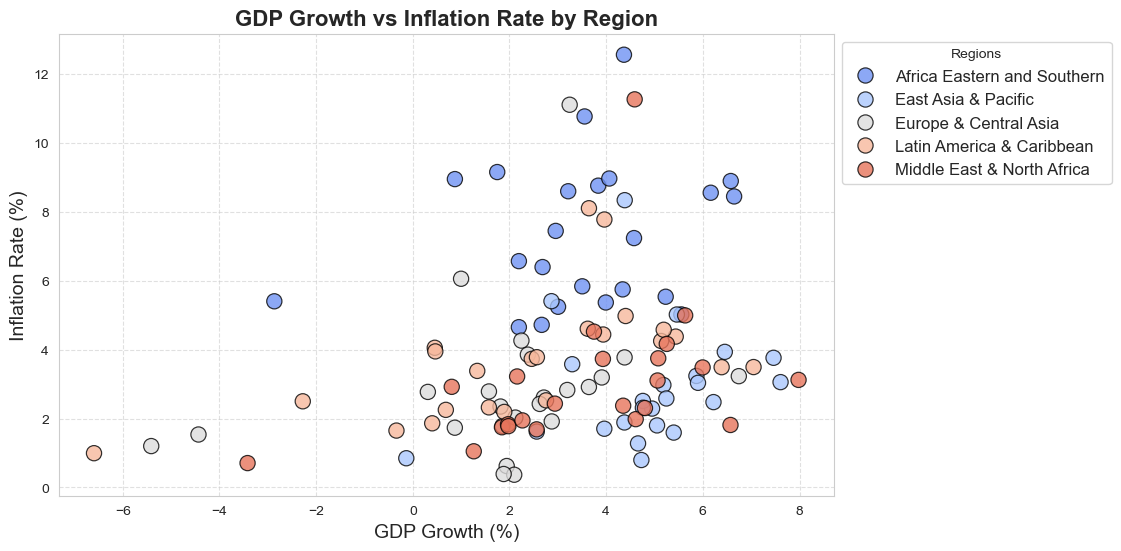

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plot_df = merged_df.dropna(subset=["GDP Growth (%)", "Inflation Rate (%)"])
regions_to_plot = ["Africa Eastern and Southern", "Latin America & Caribbean", 
                   "Europe & Central Asia", "Middle East & North Africa", "East Asia & Pacific"]
plot_df = plot_df[plot_df["Country"].isin(regions_to_plot)]

# Creating scatterplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=plot_df, x="GDP Growth (%)", y="Inflation Rate (%)", hue="Country", 
                palette="coolwarm", s=120, edgecolor="black", alpha=0.8)
ax.set_xlabel("GDP Growth (%)", fontsize=14)
ax.set_ylabel("Inflation Rate (%)", fontsize=14)
ax.set_title("GDP Growth vs Inflation Rate by Region", fontsize=16, fontweight="bold")
ax.grid(True, linestyle="--", alpha=0.6)
ax.legend(title="Regions", fontsize=12, loc="upper left", bbox_to_anchor=(1, 1))

plt.show()

# Graph #1 Explanation
The scatterplot above explores the relationship between GDP Growth (%) and Inflation Rate (%) across different world regions. Each data point represents a specific year and region, color-coded to distinguish between geographical areas. While there are some patterns in the data, the relationship between GDP growth and inflation appears complex, suggesting that other economic factors likely play a significant role in influencing inflation.

One noticeable pattern in the graph is the variation in inflation sensitivity across regions. For example, Africa Eastern and Southern show a wider range of inflation rates, even when GDP growth remains moderate. This suggests that external factors, such as commodity price fluctuations or political instability, may impact inflation more in certain regions than in others. In contrast, Europe & Central Asia display more stability, with less inflation variation, likely due to more regulated economic environments and policies. Latin America & the Caribbean appear to be more scattered, reflecting economic instability or inconsistent policy measures across different countries.

While this analysis highlights some patterns, GDP Growth and Inflation Rate alone may not be sufficient to predict economic downturns or recessions. Our research aims to explore whether additional factors, such as unemployment rates and education levels, contribute to economic instability. The findings from this graph reinforce the need for a more comprehensive approach to economic prediction. By incorporating more diverse indicators, we can gain deeper insights into the factors driving recessions and assess whether machine learning can be used to identify early warning signs of economic downturns.


In [3]:
# Creating Side by Side Box plots for the GDP Growth of 8 countries.
# Countries Code include: "Africa Eastern and Southern", "Latin America & Caribbean", 
#                         "Europe & Central Asia", "Middle East & North Africa", "East Asia & Pacific"

import plotly.express as px
import matplotlib.pyplot as plt

countries = ["Africa Eastern and Southern", "Latin America & Caribbean", "Europe & Central Asia", "Middle East & North Africa", "East Asia & Pacific"]
filtered_data = merged_df[merged_df['Country'].isin(countries)]

fig = px.box(filtered_data, 
             x = 'Country',
             y = 'GDP Growth (%)',
             title = 'Distribution of GDP Growth (%) by Country',
             labels = {'x': 'Country', 'y': 'GDP Growth (%)'},
             color = 'Country',
             )
fig.update_layout(
    plot_bgcolor = 'white',
    title_x = .4,
    legend_title = 'Regions')

fig.show()

# fig.write_image("plotly_graph.png")
# Note for Grader, this graph is run, but not showing up on Github in the submission for some reason.
# Submitting the image with the file.

# Graph #2 Explanation
This graph is a Side-By-Side box plot showing the distribution of GDP Growth % for the country regions "Africa Eastern and Southern", "Latin America & Caribbean", "Europe & Central Asia", "Middle East & North Africa", "East Asia & Pacific". The aim of the visualization is to determine which regions have grown the most over the past ~20 years. 

From the visualization, it is clear that the highest growth region is East Asia & Pacific. This is because the distribiution is very tightly centered around the median, and the lowest portion of the InterQuartile range (Q1) is significantly higher than that of the other countries displayed in the visualization.

Additionally, it is clear from the visualization that the region "Latin America & Carribean" has seen the most volatile amount of GDP Growth over the observed period, with the largest distribution and interquartile range.

<Figure size 1000x600 with 0 Axes>

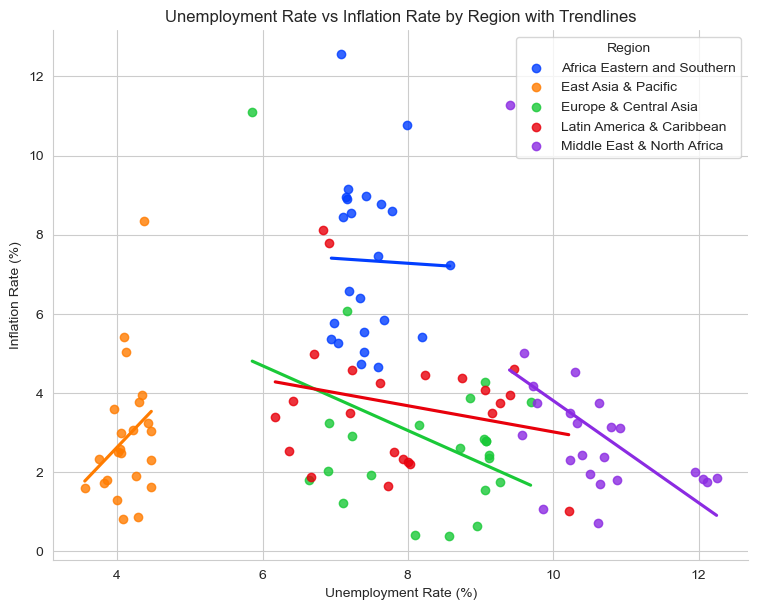

In [4]:
# Creating a new df with only data for regions in code list:
# all we need is the region name, unemployment rate, and inflation rate.

countries = ["Africa Eastern and Southern", "Latin America & Caribbean",
             "Europe & Central Asia", "Middle East & North Africa",
             "East Asia & Pacific"]

country_data = merged_df[merged_df['Country'].isin(countries)][['Country',
                                                        'Unemployment Rate (%)',
                                                        'Inflation Rate (%)']]

# Scatter plot of unemployment rate (x) vs inflation (y), countries color coded
# Trendlines / Regression lines added using sns.lmplot()

plt.figure(figsize=(10, 6))
scatter = sns.lmplot(data=country_data,
                     x="Unemployment Rate (%)",
                     y="Inflation Rate (%)",
                     hue="Country",
                     palette="bright",
                     ci=None,
                     aspect=1.3,
                     height=6)

# Set axis titles, remove the original legend and add our own
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Inflation Rate (%)")
plt.title("Unemployment Rate vs Inflation Rate by Region with Trendlines")
scatter._legend.remove()
plt.legend(title="Region", loc='upper right')

plt.show()

# Graph #3 Explanation
In the 50s and 60s, British economist [A.W. Phillips](https://www.economicshelp.org/blog/1364/economics/phillips-curve-explained/) noticed an inverse relationship of exponential decay between unemployment rate and inflation rate. Namely, those in power could either prioritize inflation which would lead to more unemployment, or they could strive to decrease the unemployment rate which would lead to higher inflation. This model is called the "Phillips Curve", and many economists have since argued that it's too simplistic and the two variables have no correlation. Regardless, we can still apply a regression model and look for this inward curve in our data:

This graph is a little chaotic, but we can see the differences where regions tend to occupy a certain section of the map. As we can see, most regions roughly mirror the Phillips Curve trend. The one exception is the data for 'East Asia and Pacific', which shows a slight positive correlation.

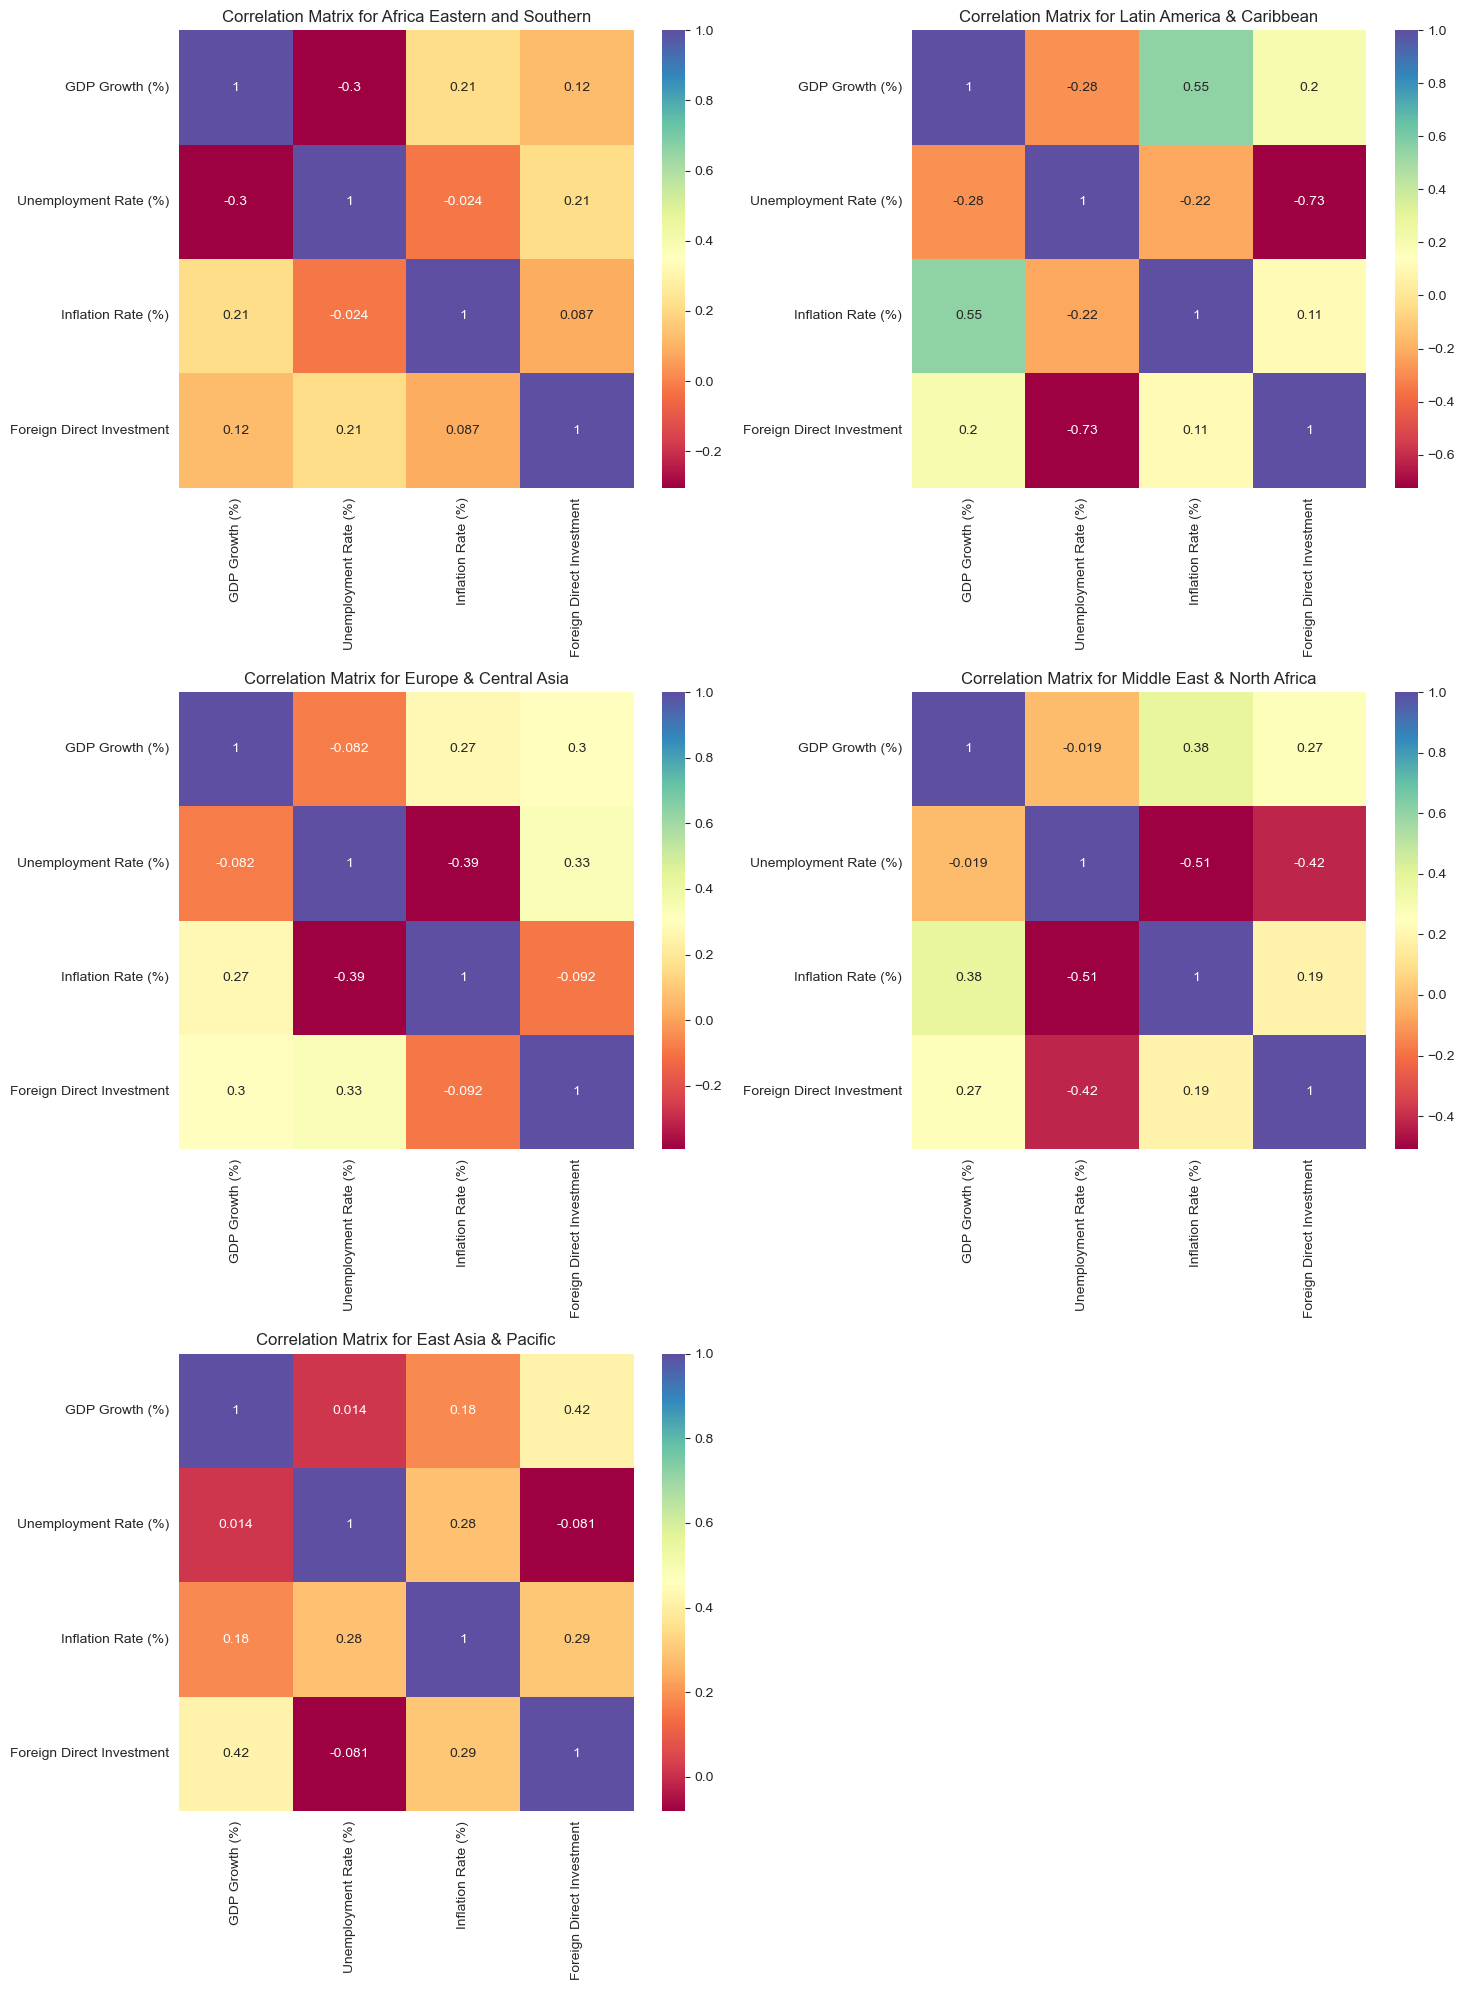

In [5]:
# Creating a Correlation Matrix for each country in the codes list, showing the correlation between features
# Countries Code include: "Africa Eastern and Southern", "Latin America & Caribbean", 
#                         "Europe & Central Asia", "Middle East & North Africa", "East Asia & Pacific"

import matplotlib.pyplot as plt
import seaborn as sns

countries = ["Africa Eastern and Southern", "Latin America & Caribbean", "Europe & Central Asia", "Middle East & North Africa", "East Asia & Pacific"]

# Create the figure
fig = plt.figure(figsize = (15,20))

# Iterates through code in the codes list enumerating each position
for i, country in enumerate(countries):

    country_data = merged_df[merged_df['Country'] == country]
    correlation_matrix = country_data[['GDP Growth (%)', 'Unemployment Rate (%)', 'Inflation Rate (%)', 'Foreign Direct Investment']].corr()
    
    current_axes = plt.subplot(3,2, i+1)
    
    sns.heatmap(correlation_matrix, annot = True, cmap = 'Spectral', ax = current_axes)
    
    current_axes.set_title(f"Correlation Matrix for {country_data['Country'].iloc[0]}")


# Creating a combined correlation matrix for analysis:
country_data = merged_df[merged_df['Country'].isin(countries)]
# country_data.to_csv('Country_Data_CSV.csv', index = False)

# # Plot the current Axis
# sns.heatmap(correlation_matrix_combined, annot = True, cmap = 'Spectral', ax = current_axes)
# current_axes.set_title(f"Correlation Matrix for all the countries combined")


# Display the subplots
plt.tight_layout()
plt.show()


# Graph #4 Explanation

For the analyses, I am going to focus on discussing the relationships between all of the features in the merged_df matrix, and their correlations with the Unemployment Rate(%).

### Relationship #1: Gdp Growth % and Unemployment Rate (%):
For the majority of the regions analyed, There is a trend towards a weak negative relationship as illustrated by the correlation matricies. While some regions saw stronger negative relationships, some regions saw practically no relationship at all.
- This means that as GDP Growth % Rises in some countries, the Unemployment rate may see a decline based on the correlations, however, this correlation appears to be non-existent in some regions.

- The countries where this relationship was the strongest include:
1. Africa Eastern and Southern (-0.30 Correlation), and 
2. Latin America and the Carribean(-0.28 Correlation)

### Relationship #2: Inflation Rate % and Unemployment Rate (%):
For the majority of the regions analyed in the matrix, There is a trend towards a relatively negative relationship as illustrated by the heatmaps. The one region that illustrated a positive relationship was East Asia and Pacific.
- This means that as Inflation Rates rise, the Unemployment rate may fall based on this correlation, however, the average correlation is inconsistent around the world.

- The countries where this relationship was the strongest include:
1. Europe and Central Asia showing a (-0.39 Correlation)
2. Middle East and North Africa showing a (-0.51 Correlation, which appears to be rather significant) 


### Relationship #3: Foreign Direct Investment, and Unemplyoment Rate (%):
For the relationship between Foreign Direct Investment, and Unemplyoment Rate (%), there is a major split between the different countries, with some regions have a weak positive relationship, and others having a stronger negative relationship.
- Countries with positive correlations: 
1. Europe and Central Asia (0.30 Correlation)

- Countries with stronger negative correlations:
1. Latin America and Carribean: (-0.62 Correlation)
2. Middle East and North Africa: (-0.50 Correlation)

# Phase III beginning: ML Model (Proof of Conecpt)

### <font color='red'> DS3000 SEC04 (Spring 2025) </font>

### <font color='red'> Professor: Dr. Mohit Singhal </font>

### <font color='red'> Team Members: Tarun, Ryan, Saanika, Alex </font>


# Examining the relationship between Foreign Direct Investment and GDP Growth (%) for the linear regression

x = Foreign Direct Investment
y = GDP Growth (%)

In this project, we are aiming to analyze the potential relationship between Foreign Direct Investment (FDI) and GDP Growth (%) using linear regression. The purpose is to explore how FDI inflows influence economic growth, as measured by GDP growth rates obtained from the World Bank's API.

**Key Concepts:**
Foreign Direct Investment (FDI) refers to investments made from an entitty one country into business interests located in another foreign country/region. This could include building new businesses, acquiring existing businesses, or expanding business operations by means of offshoring.

GDP Growth (%) represents the percentage change in the gross domestic product of a country over a specified period, in this data set, the time frame is a year. It is a critical indicator of economic performance that is measured across the entire globe!

**Problem Statement:**
We hypothesize that FDI could play a crucial role in stimulating economic growth by bringing in capital, technology, and expertise. By examining the linear relationship between these two variables, we hope to understand if there is a correlation between the two variables for various regions around the world.

<!-- 
Matrix multiplciation to run the regression on these data points doing this for 5 of the regions
Do the things from the homework, calculating Ypreds, resids, MSE, and R2 for the five regions
Then plot the regressions for the five regions essentially replicating part 2 of the HW.
Include some commentary for us to explain the  -->

### **1. The first thing we'll do to prepare for a linear regression machine leanring model is create seperate dataframes for each region:**

In [3]:
# Creating seperate dataframes for each of the regions to perform a linear regression ML model

countries = ["Africa Eastern and Southern", "Latin America & Caribbean", "Europe & Central Asia", "Middle East & North Africa", "East Asia & Pacific"]


africa_df = merged_df[merged_df['Country'] == countries[0]]
latin_america_df = merged_df[merged_df['Country'] == countries[1]]
europe_df = merged_df[merged_df['Country'] == countries[2]]
middle_east_df = merged_df[merged_df['Country'] == countries[3]]
east_asia_df = merged_df[merged_df['Country'] == countries[4]]



In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

"""
Now let's create two functions:
1. The first will add a column of ones into the input data, which will allow the
model to estimate the y-intercept as well as the slope of the regression line.
    - This is a crucial preprocessing step for this type of model.
"""

# Functions for adding a bias column and calculating line of best fit
def add_bias_column(X):

    """
    Args:
        X (array): can be either 1-d or 2-d
    
    Returns:
        Xnew (array): the same array, but 2-d with a column of 1's in the first spot
    """

    if len(X.shape) == 1:
        Xnew = np.column_stack([np.ones(X.shape[0]), X])
    elif len(X.shape) == 2:
        bias_col = np.ones((X.shape[0], 1))
        Xnew = np.hstack([bias_col, X])
    else:
        raise ValueError("Input array must be either 1-d or 2-d")
    return Xnew

"""
The next function takes the data from x and y, adds the bias column using the above function, and 
calculates the slope and intercept of the line of best fit. It does so by using the 
Ordinary Least Squares method / Normal Equation.
"""

def line_of_best_fit(X, y):

    """
    Args:
        X (array): can be either 1-d or 2-d
        y (arrya): a 1-D 
    
    Returns:
        m - an array with the Slope of the Line of Best fit, and the intercept value for the line of best fit
    """

    Xnew = add_bias_column(X)
    b = np.matmul(np.linalg.inv(np.matmul(Xnew.T, Xnew)), np.matmul(Xnew.T, y))
    np.set_printoptions(suppress=True)
    return b

"""
Next, using the specified x and y for the specific region, the linreg_predict function will use the 
data, and the slope and intercept from the line_of_best_fit function to run the regression
"""

# Linear regression prediction and residuals calculation
def linreg_predict(Xnew, ynew, m):

    '''
    Args:
    Takes in Xnew (1-d or 2-d array with predictor features (not including bias term)
    Takes in ynew (a 1-d array which includes all corresponding response values to Xnew
    m, a 1-d array of length p + 1 which contains the coefficients from the `line_of_best_fit` function

    Returns:
    ypreds, resids, mse, and r2 in a dictionary 
    '''

    Xnew = add_bias_column(Xnew)
    ypreds = np.sum(Xnew * m, axis=1)
    resids = ynew - ypreds
    mse = np.sum((resids**2)) / len(resids)
    r2 = r2_score(ynew, ypreds)
    return {'ypreds': ypreds, 'resids': resids, 'mse': mse, 'r2': r2}

"""
Next using a cross validated sample of the data, the plot_residuals_analysis function will plot the 
various graphs that will help us determine if the model for the linear regression is correctly specified.
# 1. Residuals vs Fitted plot
# 2. Residual Plot vs Order
# 3. Normal Q-Q plot
# 4. Histogram of Residuals
"""

# Residual analysis functions
def plot_residuals_analysis(y_true, y_pred, residuals):

    """
    Args:
    y_true from the cross validation
    y_Pred from the cross validation
    residuals from Y_true - y_pred
    
    Returns:
    # 1. Residuals vs Fitted plot
    # 2. Residual Plot vs Order
    # 3. Normal Q-Q plot
    # 4. Histogram of Residuals
    """

    # 1. Residuals vs Fitted plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals)
    plt.axhline(0, color='blue', linestyle='--')
    plt.xlabel("Fitted Values")
    plt.ylabel("Residuals")
    plt.title("Residuals vs Fitted")
    plt.show()

    # 2. Residual Plot vs Order
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(residuals)), residuals)
    plt.axhline(0, color='blue', linestyle='--')
    plt.xlabel("Order of Data")
    plt.ylabel("Residuals")
    plt.title("Residual Plot vs Order")
    plt.show()

    # 3. Normal Q-Q plot
    plt.figure(figsize=(10, 6))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title("Normal Q-Q Plot")
    plt.show()

    # 4. Histogram of Residuals
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, bins=15)
    plt.title("Histogram of Residuals")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.show()

"""
Finally, the evaluate Model function will be used to tie all of the other functions above together.

The model will plot the data vs the line of best fit that is fitted to the historical data.

The function will also perform cross validation on the data, splitting it into training and 
testing data. This will be used to validate the model, and check that the assumptions
of a linear regression are not being violated.

Additionally, the function will call plot_residuals_analysis on the cross validated 
sample of the data.
"""

# Function to train and evaluate the model
def evaluate_model(X, y, region_name):

    # Testing the regression before cross validation
    X = X
    y = y
    all_data_m = line_of_best_fit(X, y)
    all_data_result = linreg_predict(X, y, all_data_m)

    print('Plotting the historical Data with the Line of best fit')

    # Plot the results from the full data set
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, label='Actual Data', alpha=0.7)
    plt.plot(X, all_data_result['ypreds'], color='red', label='Best Fit Line')
    plt.xlabel("Foreign Direct Investment (%)")
    plt.ylabel("GDP Growth (%)")
    plt.title(f"GDP vs FDI for {region_name}")
    plt.legend()
    plt.show()

    # Cross validating the data in the regression analysis
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    m = line_of_best_fit(X_train, y_train)
    result = linreg_predict(X_test, y_test, m)

    print(f"Model for {region_name}:")
    print(f"Mean Squared Error: {round(result['mse'], 3)}")
    print(f"R² Score: {round(result['r2'], 3)}")

    # Plot the results from the cross validated sample
    plt.figure(figsize=(8, 5))
    plt.scatter(X_test, y_test, label='Actual Data', alpha=0.7)
    plt.plot(X_test, result['ypreds'], color='red', label='Best Fit Line')
    plt.xlabel("Foreign Direct Investment (%)")
    plt.ylabel("GDP Growth (%)")
    plt.title(f"GDP vs FDI for {region_name}")
    plt.legend()
    plt.show()

    # Perform residuals analysis
    plot_residuals_analysis(y_test, result['ypreds'], result['resids'])



Evaluating model for Africa Eastern and Southern...

Plotting the historical Data with the Line of best fit


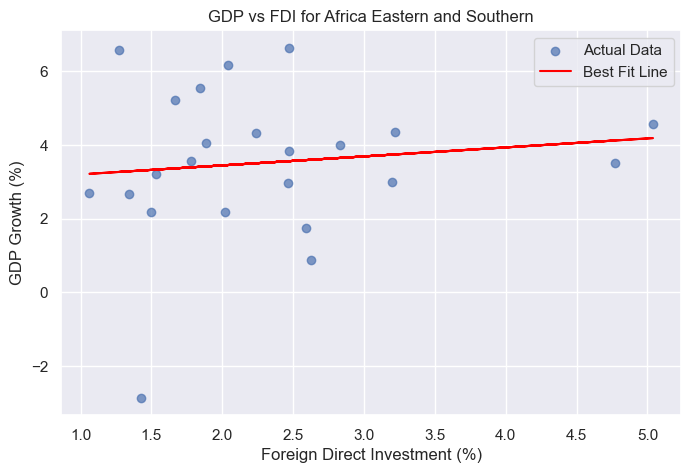

Model for Africa Eastern and Southern:
Mean Squared Error: 3.03
R² Score: -1.648


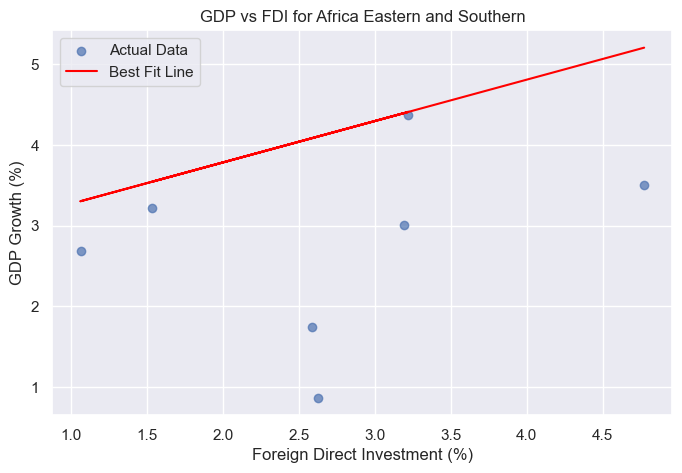

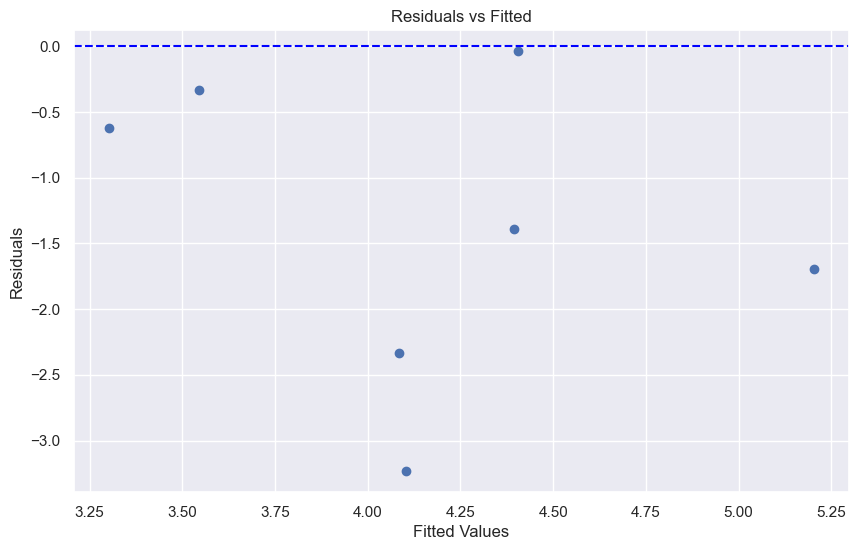

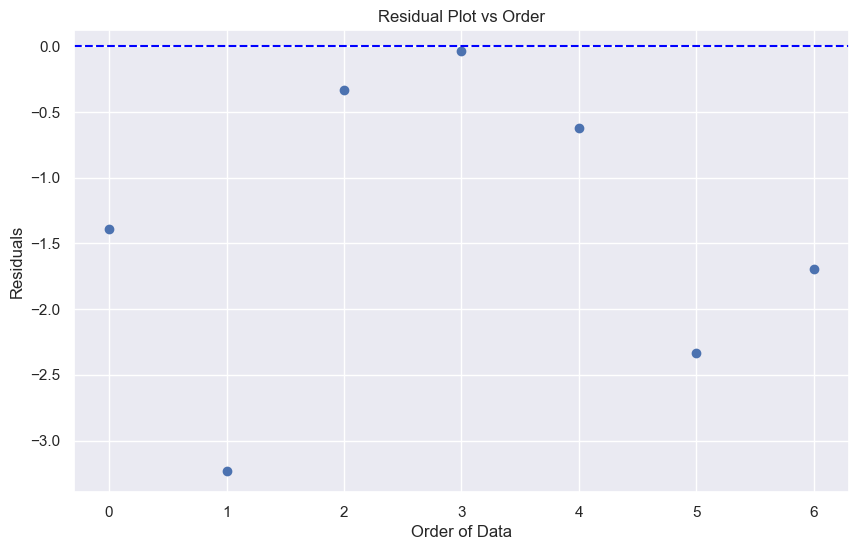

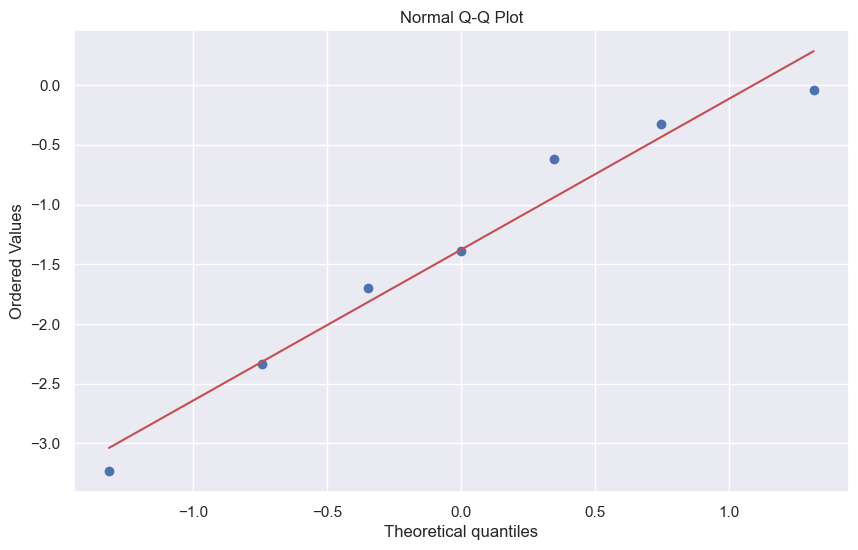

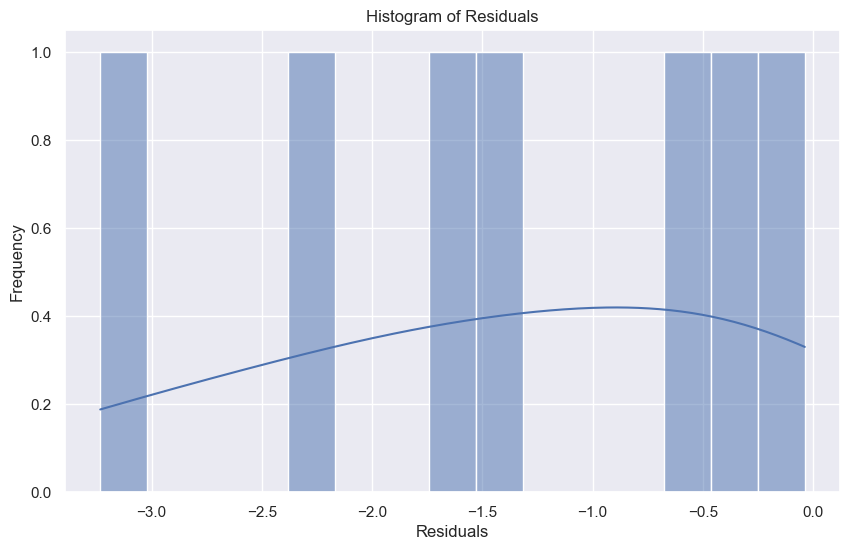


Evaluating model for Latin America & Caribbean...

Plotting the historical Data with the Line of best fit


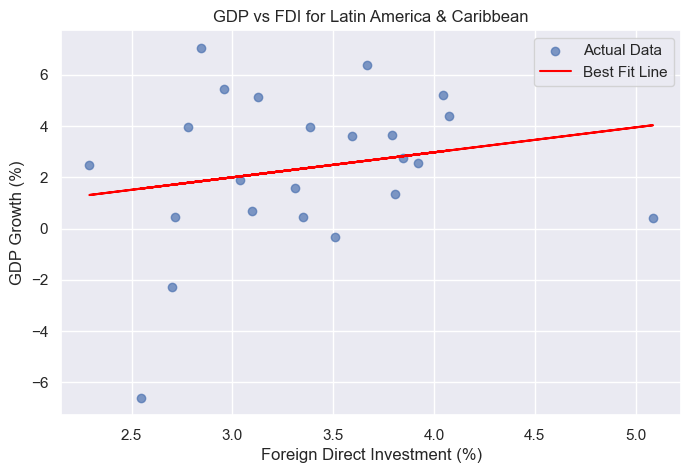

Model for Latin America & Caribbean:
Mean Squared Error: 8.253
R² Score: -1.145


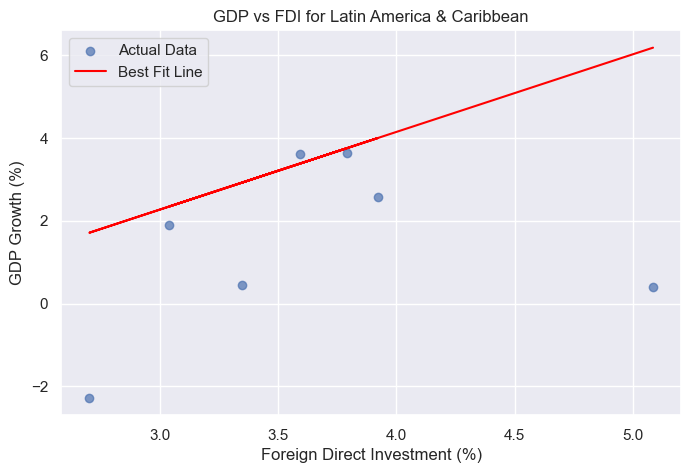

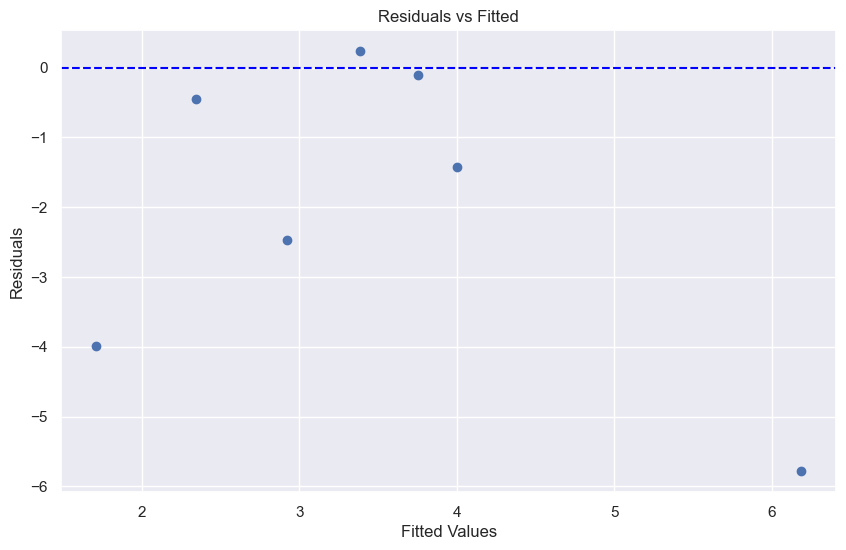

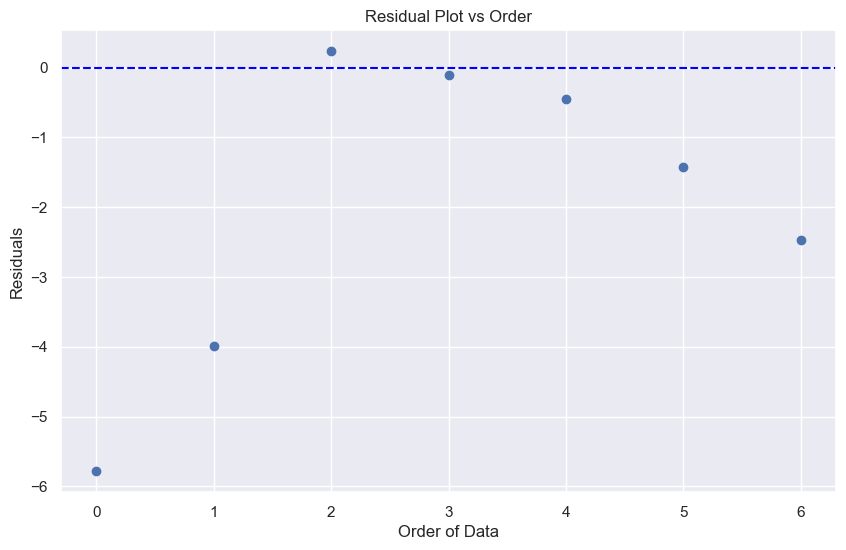

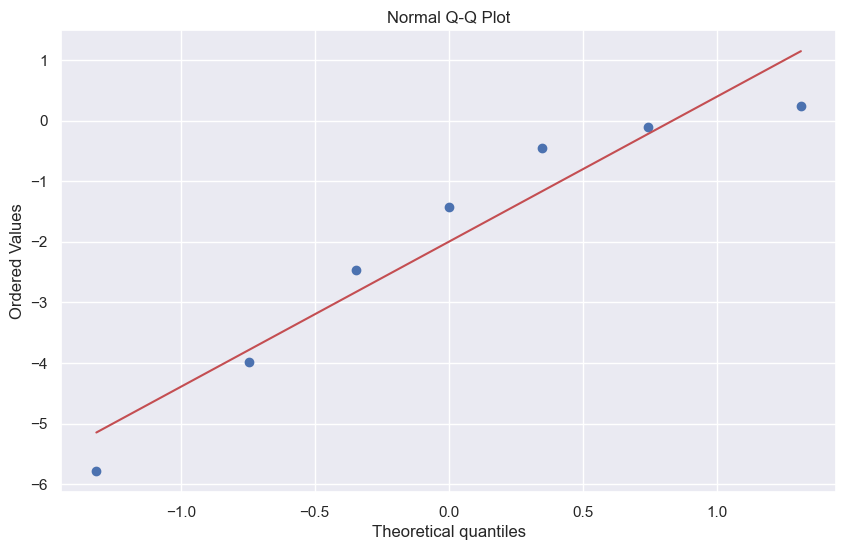

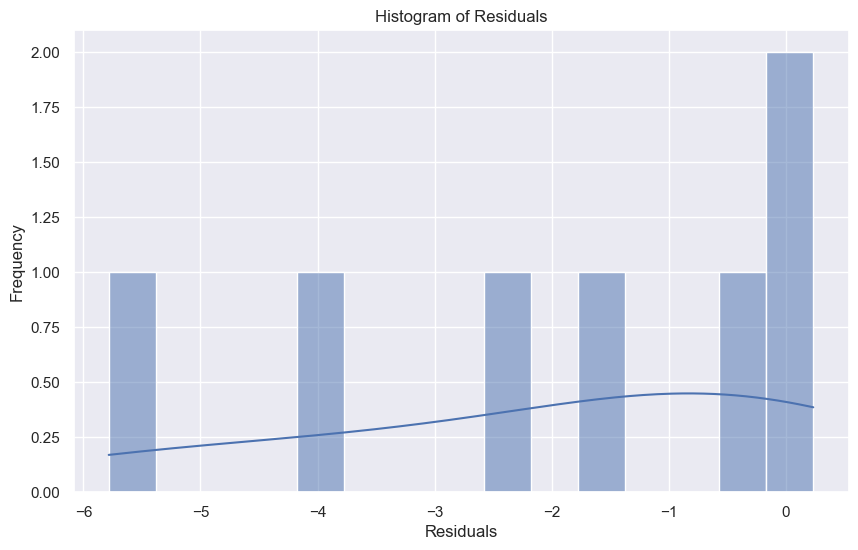


Evaluating model for Europe & Central Asia...

Plotting the historical Data with the Line of best fit


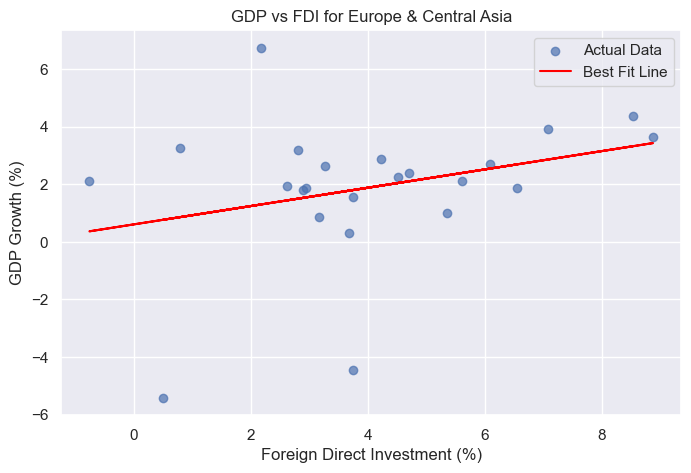

Model for Europe & Central Asia:
Mean Squared Error: 7.485
R² Score: -0.106


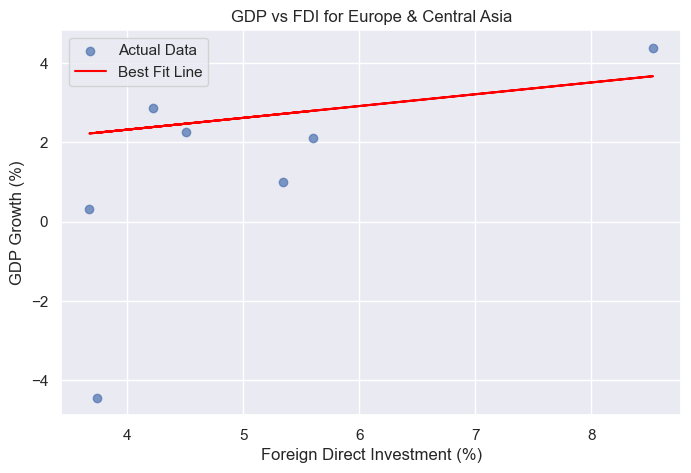

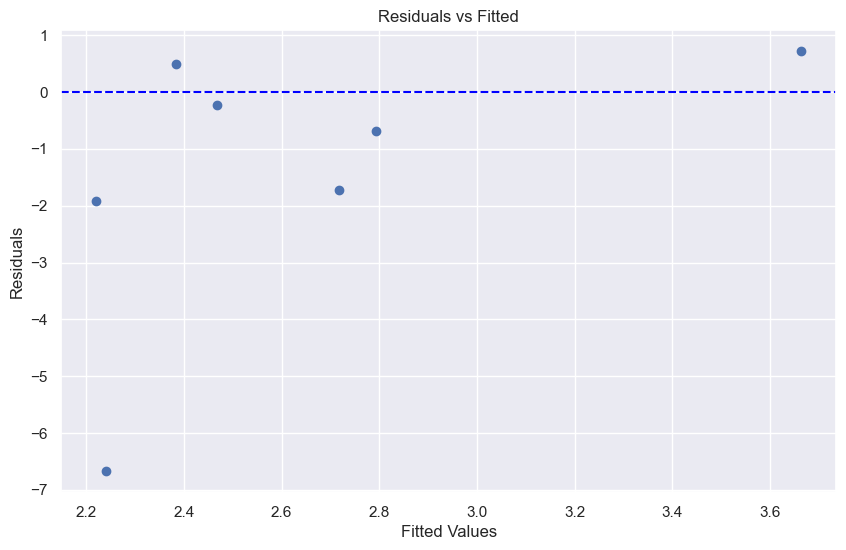

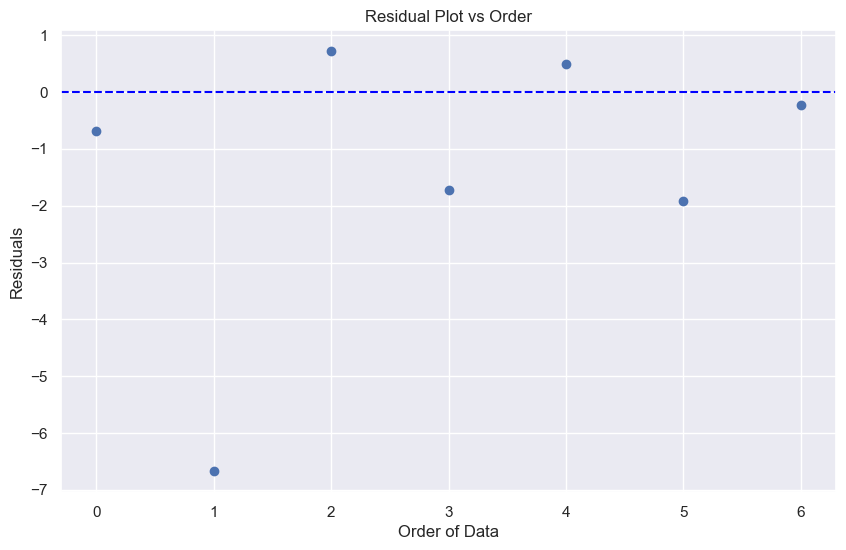

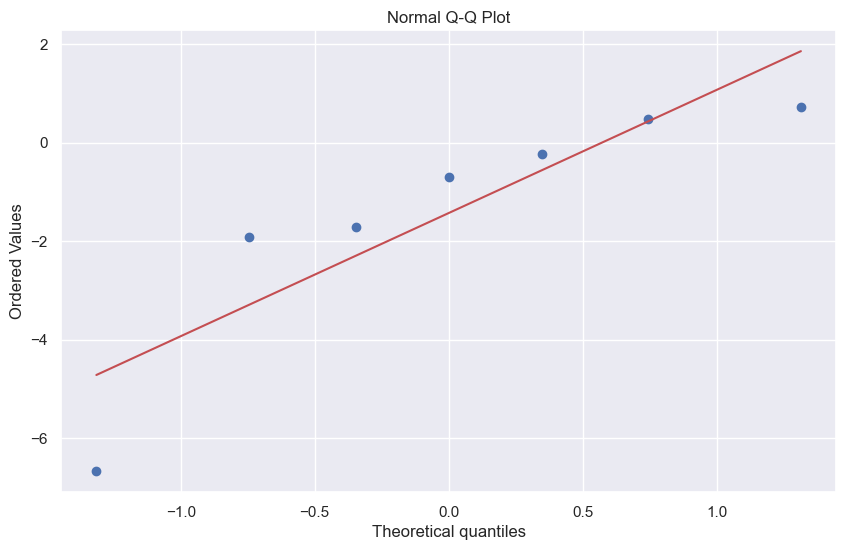

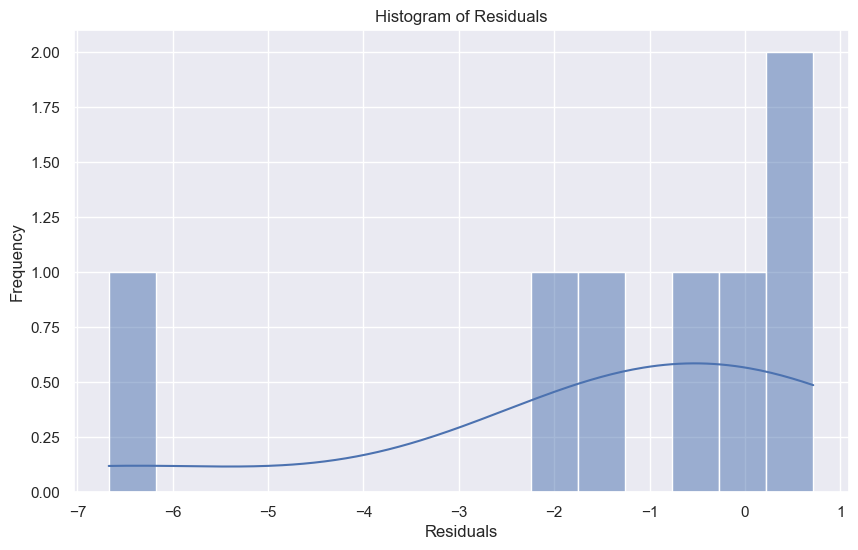


Evaluating model for Middle East & North Africa...

Plotting the historical Data with the Line of best fit


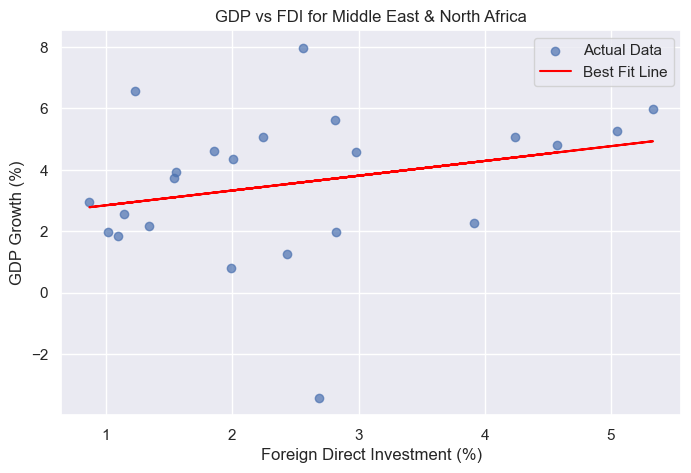

Model for Middle East & North Africa:
Mean Squared Error: 3.62
R² Score: -0.087


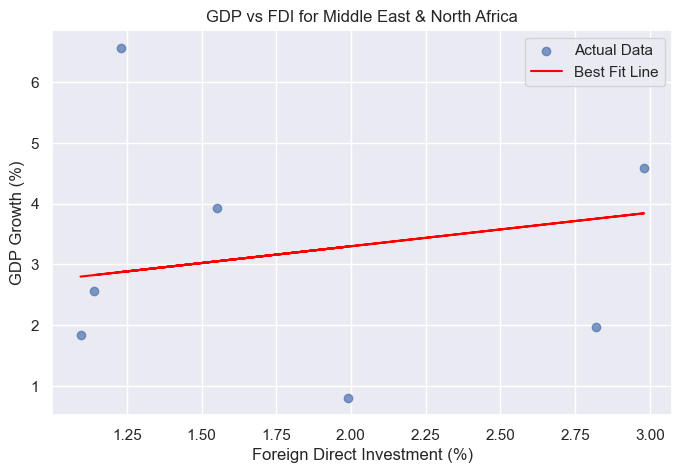

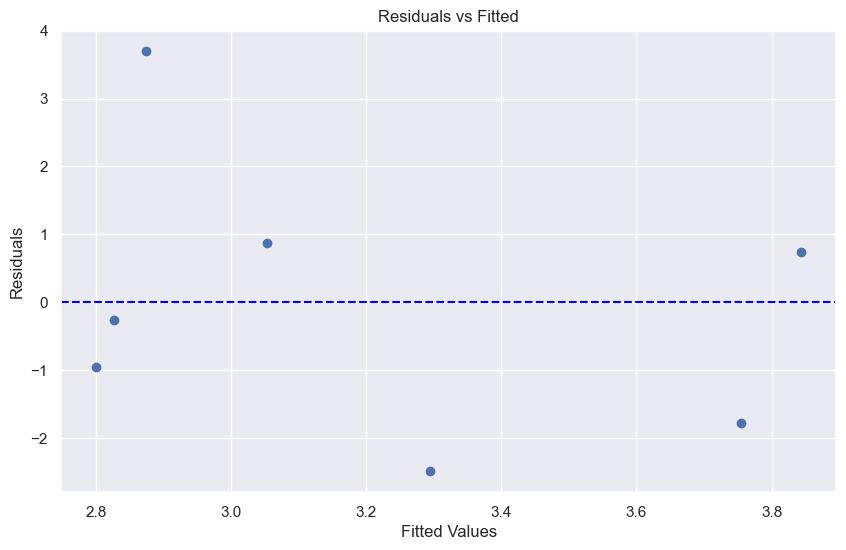

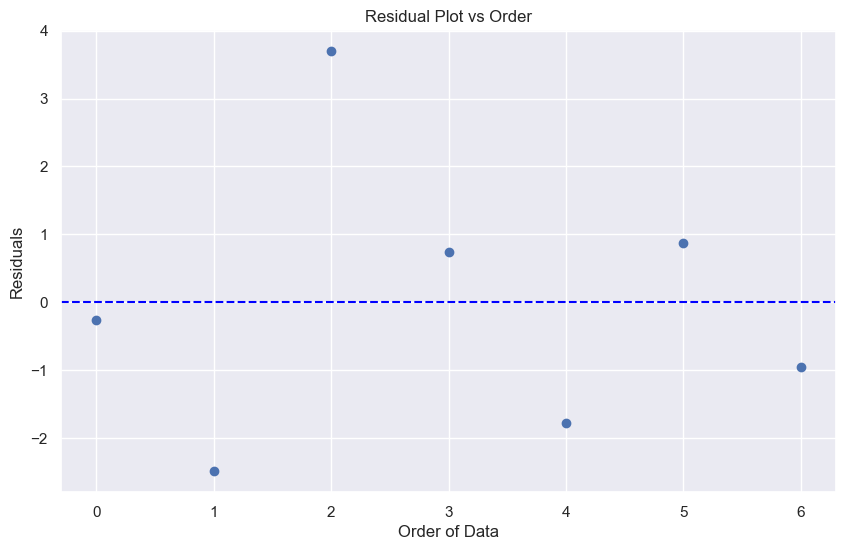

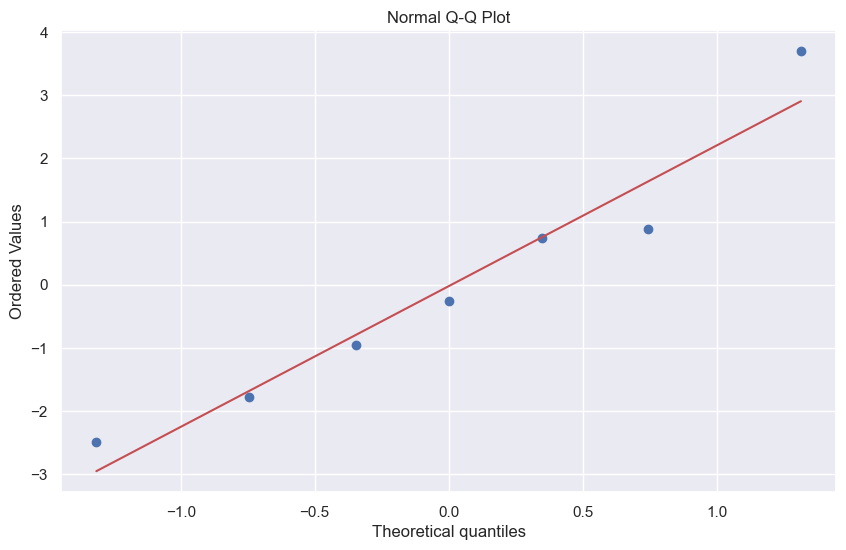

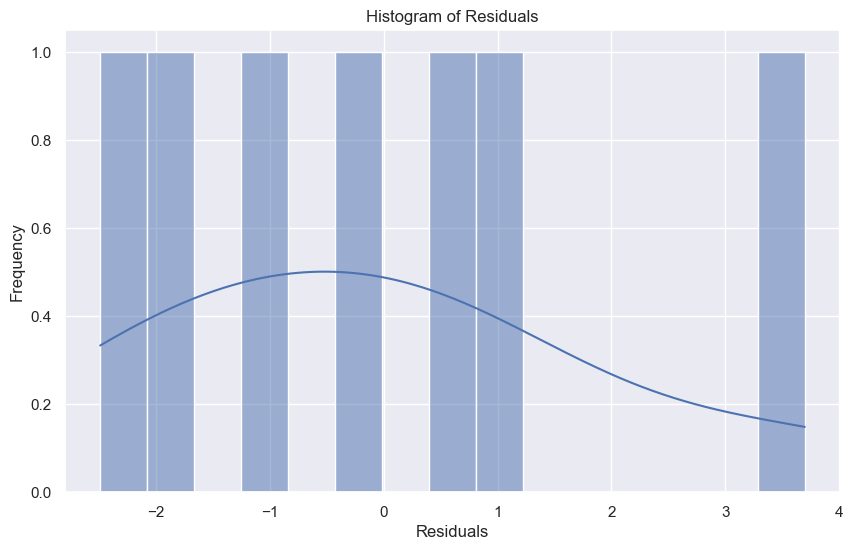


Evaluating model for East Asia & Pacific...

Plotting the historical Data with the Line of best fit


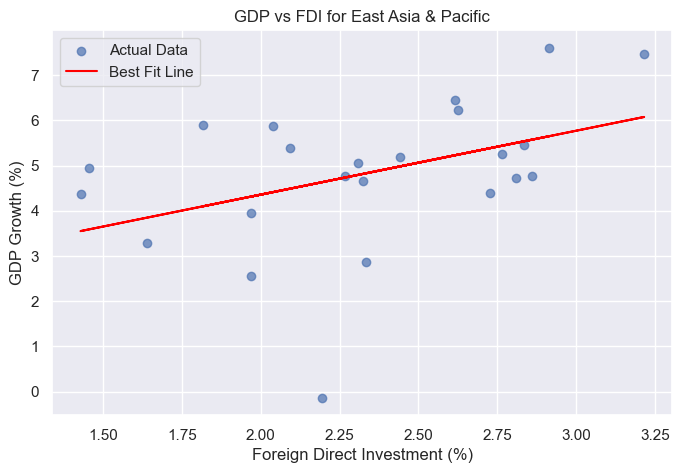

Model for East Asia & Pacific:
Mean Squared Error: 1.001
R² Score: -0.042


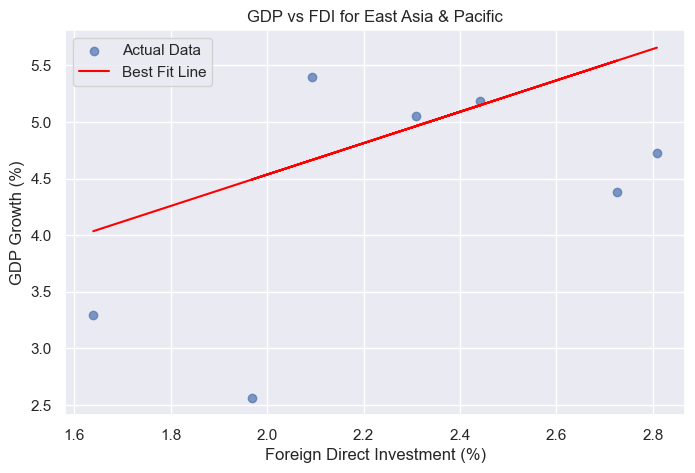

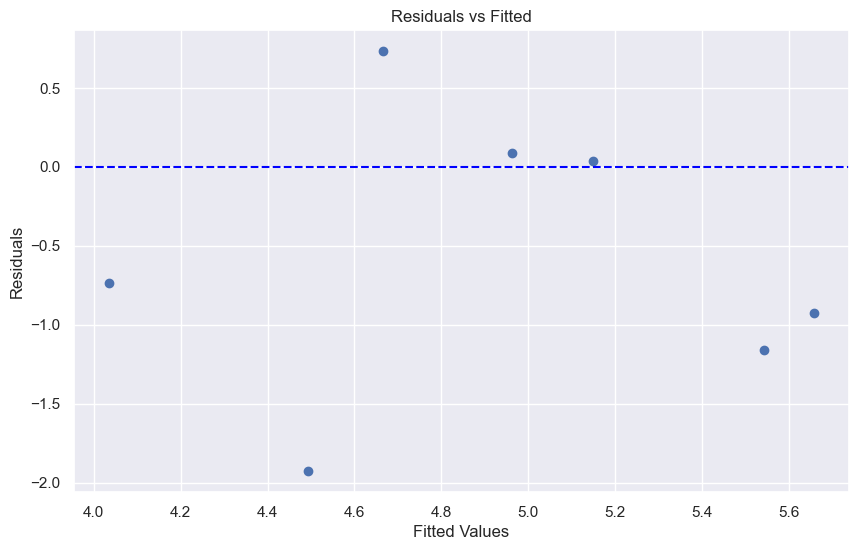

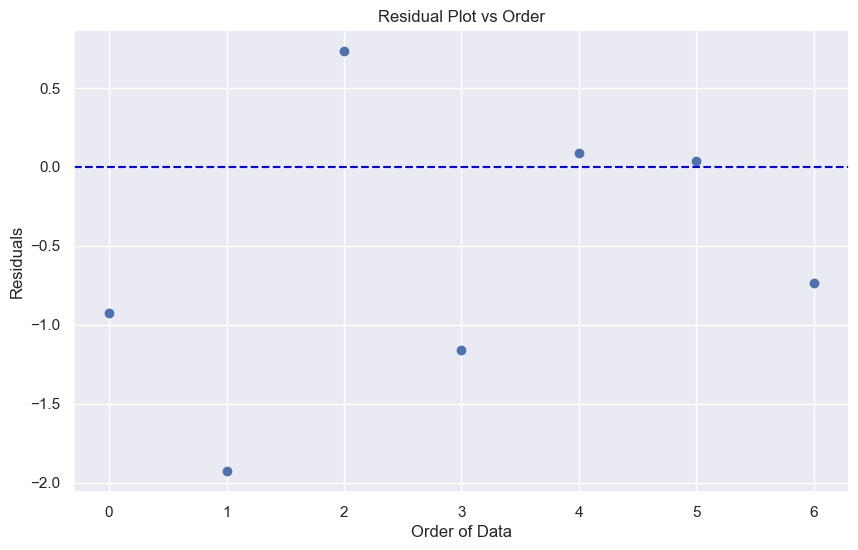

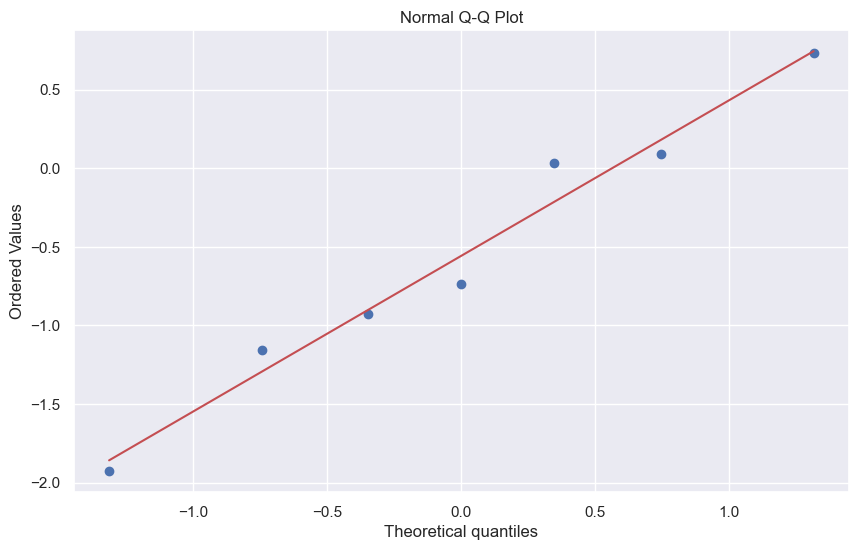

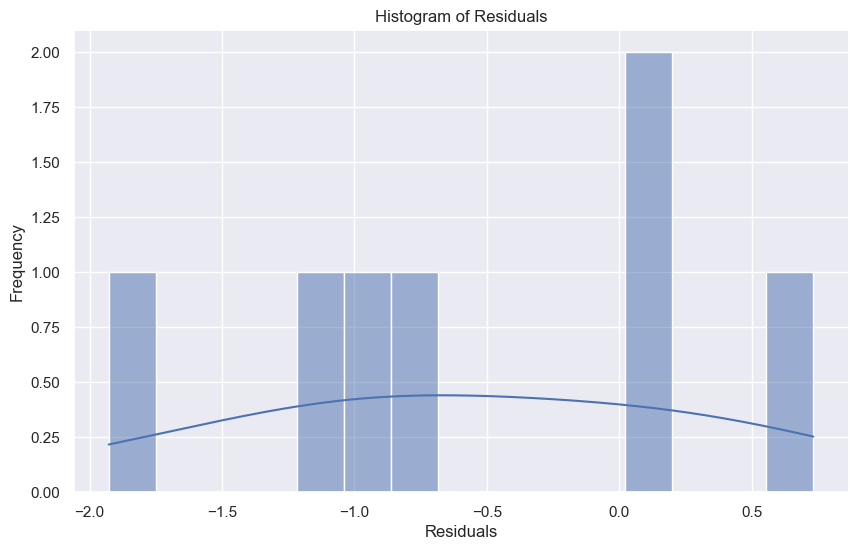

In [ ]:
# List of region names and corresponding dataframes
regions = [
    ("Africa Eastern and Southern", africa_df['Foreign Direct Investment'], africa_df['GDP Growth (%)']),
    ("Latin America & Caribbean", latin_america_df['Foreign Direct Investment'], latin_america_df['GDP Growth (%)']),
    ("Europe & Central Asia", europe_df['Foreign Direct Investment'], europe_df['GDP Growth (%)']),
    ("Middle East & North Africa", middle_east_df['Foreign Direct Investment'], middle_east_df['GDP Growth (%)']),
    ("East Asia & Pacific", east_asia_df['Foreign Direct Investment'], east_asia_df['GDP Growth (%)'])
]

# Loop through each region, evaluate the model, and show results
for region_name, X, y in regions:
    print(f"\nEvaluating model for {region_name}...\n")
    evaluate_model(X, y, region_name)


In [39]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

def add_bias_column(X):
    """Adds a bias column of 1s to the input array.
    
    Args:
        X (array): Can be either 1D or 2D.
    
    Returns:
        Xnew (array): The same array, but with a bias column added.
    """
    if len(X.shape) == 1:
        Xnew = np.column_stack([np.ones(X.shape[0]), X])
    elif len(X.shape) == 2:
        bias_col = np.ones((X.shape[0], 1))
        Xnew = np.hstack([bias_col, X])
    else:
        raise ValueError("Input array must be either 1D or 2D")
    return Xnew

def line_of_best_fit(X, y):
    """Computes the coefficients for the best-fit polynomial regression model.
    
    Args:
        X (array): Independent variable (without bias term).
        y (array): Dependent variable.
    
    Returns:
        m (array): Coefficients of the polynomial regression model, including intercept.
    """
    X_new = add_bias_column(X)  # Add bias column
    XtX_inv = np.linalg.inv(np.matmul(X_new.T, X_new))
    m = np.matmul(XtX_inv, np.matmul(X_new.T, y))
    return m

def linreg_predict(Xnew, ynew, m):
    """Predicts values and evaluates model performance.
    
    Args:
        Xnew (array): Independent variable (without bias term).
        ynew (array): Actual dependent variable values.
        m (array): Model coefficients.
    
    Returns:
        output_dict (dict): Dictionary with predictions, residuals, MSE, and R².
    """
    output_dict = {}
    Xnew_bias_added = add_bias_column(Xnew)
    ypreds = np.matmul(Xnew_bias_added, m)  # Predictions
    res = ynew - ypreds  # Residuals
    mse = (res**2).mean()  # Mean Squared Error
    r2 = r2_score(ynew, ypreds)  # R² Score

    output_dict['mse'] = mse
    output_dict['r2'] = r2
    return output_dict

def polynomial_regression_for_region(region_name, X, y, degree=4):
    """Applies polynomial regression to a specific region's dataset.
    
    Args:
        region_name (str): Name of the region.
        X (array): Independent variable (FDI).
        y (array): Dependent variable (GDP Growth).
        degree (int): Degree of the polynomial model.
    
    Returns:
        None
    """
    X = np.array(X).reshape(-1, 1)
    y = np.array(y)

    # Transform features into polynomial form
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)[:, 1:]  # Remove bias term since we'll add it separately

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=3)

    # Compute best-fit polynomial model
    m = line_of_best_fit(X_train, y_train)
    model_results = linreg_predict(X_test, y_test, m)

    print(f"Polynomial Regression (d={degree}) for {region_name}:")
    print(f"MSE: {round(model_results['mse'], 3)}")
    print(f"R²: {round(model_results['r2'], 4)}\n")

# Apply polynomial regression for each region
regions = [
    ("Africa Eastern and Southern", africa_df['Foreign Direct Investment'], africa_df['GDP Growth (%)']),
    ("Latin America & Caribbean", latin_america_df['Foreign Direct Investment'], latin_america_df['GDP Growth (%)']),
    ("Europe & Central Asia", europe_df['Foreign Direct Investment'], europe_df['GDP Growth (%)']),
    ("Middle East & North Africa", middle_east_df['Foreign Direct Investment'], middle_east_df['GDP Growth (%)']),
    ("East Asia & Pacific", east_asia_df['Foreign Direct Investment'], east_asia_df['GDP Growth (%)'])
]

for region_name, X, y in regions:
    polynomial_regression_for_region(region_name, X, y, degree=4)


Polynomial Regression (d=4) for Africa Eastern and Southern:
MSE: 396759.226
R²: -464930.0882

Polynomial Regression (d=4) for Latin America & Caribbean:
MSE: 4559.033
R²: -870.5203

Polynomial Regression (d=4) for Europe & Central Asia:
MSE: 6.529
R²: -0.9193

Polynomial Regression (d=4) for Middle East & North Africa:
MSE: 0.718
R²: 0.3905

Polynomial Regression (d=4) for East Asia & Pacific:
MSE: 3.157
R²: -3.911



# Preliminary Discussion + Ethics of the project
# Alex and Saanika to update

Discussion about what we learned from the model and the linear regression

Discussion about ethics of the project.

In [27]:
# Drop rows with missing values
merged_df_cleaned = merged_df.dropna(subset=['Foreign Direct Investment', 'GDP Growth (%)', 'Country'])

# Prepare the data
X_fdi = np.array(merged_df_cleaned['Foreign Direct Investment']).reshape(-1, 1)
y = merged_df_cleaned['GDP Growth (%)']

# Convert Country to numerical codes
X_country = merged_df_cleaned['Country'].astype('category').cat.codes.values.reshape(-1, 1)

# Polynomial transformation (degree = 4)
poly = PolynomialFeatures(degree=4)
X_fdi_poly_bias = poly.fit_transform(X_fdi)
X_fdi_poly = X_fdi_poly_bias[:, 1:]  

# Add interaction terms between polynomial features and country dummy variable
X_poly_interaction = np.concatenate([
    X_fdi_poly,                 # Polynomial features
    X_fdi_poly * X_country,      # Interaction terms
    (1 - X_country) * X_fdi_poly # Alternative interaction terms
], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly_interaction, y, test_size=0.3, random_state=3)

# Find the best-fit model
m = line_of_best_fit(X_train, y_train)
model = linreg_predict(X_test, y_test, m)

print('MSE for polynomial regression with interactions =', model['mse'].round(3))
print('R² for polynomial regression with interactions =', round(model['r2'], 4))


MSE for polynomial regression with interactions = 10.034
R² for polynomial regression with interactions = -0.0947
